Linear Model


\begin{equation}
z_n=0.5z_{n-1}+\xi_{n-1}
\end{equation}
with
$\xi_{n-1}\sim N(0,B)$ and $z_{0}\sim N(0,0.4)$

Observations
\begin{equation}
y_n=z_n+\eta_n
\end{equation}
$\eta_{n-1}\sim N(0,R)$

Kalman filter

Forecast formulas:
\begin{align}
\hat{m}_{n+1}&=Am_n\\
\hat{C}_{n+1}&=AC_nA^{\top}+B
\end{align}


Analysis formulas
\begin{align}
m_{n+1}&=\hat{m}_{n+1}-K_{n+1}(H\hat{m}_{n+1}-y_{n+1})\\
C_{n+1}&=\hat{C}_{n+1}-K_{n+1}H\hat{C}_{n+1}
\end{align}

with Kalman gain
\begin{equation}
K_{n+1}=\hat{C}_{n+1}H^{\top}(R+H\hat{C}_{n+1}H^{\top})^{-1}
\end{equation}

Exercise: Please implement the Kalman filter for the example above


In [153]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123541312)

n = 100

z = np.zeros((n))
m = np.zeros((n))
mh = np.zeros((n))
y = np.zeros((n))
C = np.zeros((n))
Ch = np.zeros((n))
K = np.zeros((n))

A = .5
B = .2
C[0] = .4
R = .01
H = 1

zeta = np.random.normal(0, B, n)
nu = np.random.normal(0, R, n)

z[0] = np.random.normal(0, C[0])
#m[0] = z[0] + np.random.normal(0, C[0])
#y[0] = A * z[0] + np.random.normal(0, R)
#y = np.random.normal(0, R, n)
for i in range(1,n):
    z[i] = A * z[i-1] + zeta[i-1]
    y[i] = z[i] + nu[i]
    mh[i] = A * m[i-1]
    Ch[i] = A * C[i-1] * (A) + B
    tmp = (R + H * Ch[i] * H)**-1
    
    K[i] = Ch[i] * H * tmp
    
    m[i] = mh[i] - K[i] * (H * mh[i] - y[i])
    C[i] = Ch[i] - K[i] * H * Ch[i]
    

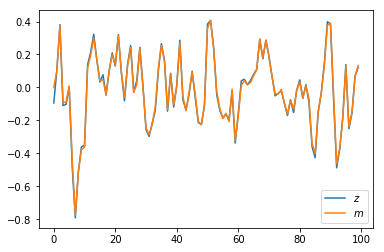

In [155]:
fig, ax = plt.subplots()
ax.plot(np.arange(n), z, label=r'$z$')
ax.plot(np.arange(n), m, label=r'$m$')
ax.legend()
plt.show()

Lorenz equations


\begin{align}
\dot{x}&=\sigma(y-x)\\
\dot{y}&=x(\rho-z)-y\\
\dot{z}&=xy-\beta z
\end{align}

Ensemble Kalman Filter
\begin{equation}
z^i_{n+1}=\hat{z}^i_{n+1}-K_{n+1}(H\hat{z}^i_{n+1}-\tilde{y}^i_{n+1})
\end{equation}

\begin{align}
m_{n}&\approx\frac{1}{M}\sum^M_{i=1}z^i_{n}\\
C_{n}&\approx\frac{1}{M}\sum^M_{i=1}(z^i_{n}-m_{n})(z^i_{n}-m_{n})^{\top}
\end{align}

Exercise: Please implement the Ensemble Kalman filter for the Lorenz equation



In [136]:
print(np.random.normal(0,.5))
print(np.random.normal(0,.5))
print(np.random.normal(0,.5))

-0.3361674521583494
-0.725134608064816
-0.14141425362894902


In [137]:
print(np.random.normal(0,.5))
print(np.random.normal(0,.5))
print(np.random.normal(0,.5))

0.6353348587000686
-0.041421639579359196
-0.2458993929843669


Particle filter


Exercise: Please implement the Particle filter with resampling for the Lorenz equation


